In [26]:
import numpy as np
import pandas as pd
import joblib
import matplotlib.pyplot as plt
import tensorflow as tf

In [27]:
COIN_NAME = "BinanceCoin"
HORIZON = "1h"        # "1h" / "12h" / "24h" / "48h"

BASE_DIR = "/Users/ayushgupta/Desktop/ML-Driven-Web-Platform-for-Cryptocurrency-Price-Forecasting_November_Batch-5_2025"

MODEL_PATH  = f"{BASE_DIR}/Milestone_2/model/{COIN_NAME}/lstm_{COIN_NAME}_{HORIZON}_final.keras"
SCALER_PATH = f"{BASE_DIR}/Milestone_1/data/processed/{COIN_NAME}_scaler.pkl"
CSV_PATH    = f"{BASE_DIR}/Milestone_1/data/processed/{COIN_NAME}_processed.csv"
SEQ_PATH = f"{BASE_DIR}/Milestone_1/data/sequences/{COIN_NAME}/{HORIZON}/"

SEQ_LEN = 48

# Load Dataframe

In [28]:
feature_cols = [
    "open","high","low","close","volume",
    "return_1h","volatility_24h",
    "ma_24","ma_168","ma_ratio",
    "vol_change","missing_flag"
]

# Loading Model 

In [29]:
print("Loading model...")
model = tf.keras.models.load_model(MODEL_PATH)

print("Loading scaler...")
scaler = joblib.load(SCALER_PATH)

Loading model...
Loading scaler...


/opt/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/saving/saving_lib.py:797: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 12 variables whereas the saved optimizer has 22 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [30]:
print("Loading sequences...")
X_test = np.load(SEQ_PATH + "X_test.npy")
y_test = np.load(SEQ_PATH + "y_test.npy")

Loading sequences...


In [31]:
print("Predicting on test set...")
pred_scaled = model.predict(X_test).flatten()

Predicting on test set...
206/206 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


# Inverse Predictions

In [32]:
dummy_pred = np.zeros((len(pred_scaled), len(feature_cols)))
dummy_pred[:, feature_cols.index("close")] = pred_scaled
pred_real = scaler.inverse_transform(dummy_pred)[:, feature_cols.index("close")]

# Inverse Actual

In [33]:
dummy_true = np.zeros((len(y_test), len(feature_cols)))
dummy_true[:, feature_cols.index("close")] = y_test
true_real = scaler.inverse_transform(dummy_true)[:, feature_cols.index("close")]

In [14]:
if HORIZON == "1h":
    real_value_index = -1
else:
    # for multi-hour horizons, we need offset
    offset = int(HORIZON.replace("h", ""))
    real_value_index = -(offset + 1)

actual_scaled = df["close"].iloc[real_value_index]
actual_dummy = np.zeros((1, len(feature_cols)))
actual_dummy[0][feature_cols.index("close")] = actual_scaled
actual_real = scaler.inverse_transform(actual_dummy)[0][feature_cols.index("close")]

print("================ ACTUAL VALUE ====================")
print(f"Actual Close Price: {actual_real:.4f}")
print("=================================================\n")

================ ACTUAL VALUE ====================
Actual Close Price: 915.4600



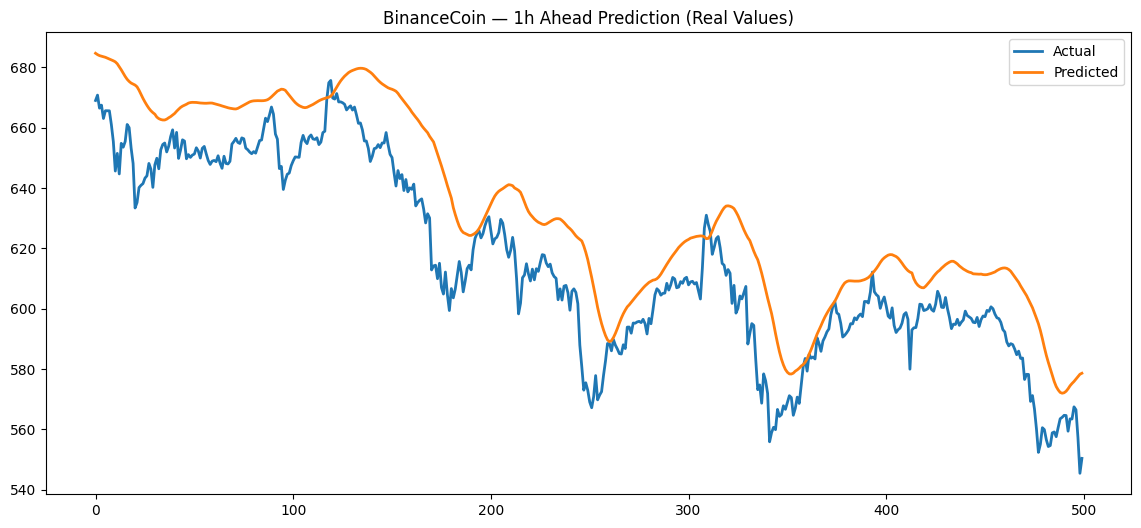

In [34]:
plt.figure(figsize=(14,6))
plt.plot(true_real[:500], label="Actual", linewidth=2)
plt.plot(pred_real[:500], label="Predicted", linewidth=2)
plt.legend()
plt.title(f"{COIN_NAME} — {HORIZON} Ahead Prediction (Real Values)")
plt.show()

In [16]:
print("Min values:", scaler.data_min_)
print("Max values:", scaler.data_max_)

Min values: [26.8246     26.916      26.35       26.8271      0.          0.
 -0.15526009  0.         27.2015     28.17150893  0.66184162 -1.        ]
Max values: [1.36876000e+03 1.37511000e+03 1.34350000e+03 1.36876000e+03
 2.00289855e+06 1.00000000e+00 1.48012232e-01 5.86972982e-02
 1.30600958e+03 1.24900744e+03 1.75849102e+00 8.96590917e+01]
